In [1]:
import sys
import collections
from collections import Counter, defaultdict
import re

import datetime
from datetime import datetime, timedelta, timezone
import dateutil.parser

import statistics
from statistics import median
from itertools import zip_longest

import pytz
from pytz import timezone

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999

import pydent
from pydent import AqSession, models
from pydent.models import Sample, Item, Plan

sys.path.append("../ext-plan-pydent")
from plans import ExternalPlan

In [2]:
session = ExternalPlan.create_session("production")

../ext-plan-pydent/plans.py:69: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Connected to Aquarium at http://52.27.43.242/ using pydent version 0.1.5a1
Logged in as Devin Strickland



In [3]:
sample_type = session.SampleType.find_by_name("Plasmid")
user = session.User.find_by_name("Eriberto Lopez")

samples = session.Sample.where({"sample_type_id": sample_type.id, "user_id": user.id})

In [7]:
riboswitch_samples = [s for s in samples if re.match("Salis Lab Aptamer variant", s.name)]
print(len(riboswitch_samples))
sample_ids = list([s.id for s in riboswitch_samples])

127


In [8]:
ot = session.ObjectType.find_by_name("Purified Plasmid Stock")

items = session.Item.where({"sample_id": sample_ids, "object_type_id": ot.id, })
print(len(items))

142


In [9]:
nondeleted_items = [i for i in items if i.location != 'deleted']
print(len(nondeleted_items))

0


In [12]:
output_columns = [
    "name",
    "item_id",
    "volume",
    "concentration",
    "ginkgo_id"
]

output_data = []

for i in items:
    row = {}
    row["name"] = i.sample.name
    
    ginkgo_id = re.search("m\d+", i.sample.description)
    if ginkgo_id:
        row["ginkgo_id"] = ginkgo_id.group(0)
        
    row["item_id"] = i.id
    row["volume"] = i.get("volume")
    row["concentration"] = i.get("concentration")
    if row["volume"] and row["concentration"]:
        row["volume"] = float(row["volume"])
        row["concentration"] = float(row["concentration"])
        
        
    output_data.append(row)
        

In [13]:
output_df = pd.DataFrame(data=output_data, columns=output_columns)
output_df#.sort_values(by="volume")

,name,item_id,volume,concentration,ginkgo_id
0,Salis Lab Aptamer variant1 L-424 Plasmid,331273,NaN,166.4,m2446443
1,Salis Lab Aptamer variant1 L-487 Plasmid,332557,NaN,108,m2446349
2,Salis Lab Aptamer variant1 L-479 Plasmid,332558,NaN,116.3,m2446335
3,Salis Lab Aptamer variant1 L-479 Plasmid,332559,NaN,119.4,m2446335
4,Salis Lab Aptamer variant1 L-476 Plasmid,332560,NaN,110,m2446329
5,Salis Lab Aptamer variant1 L-476 Plasmid,332561,NaN,119.9,m2446329
6,Salis Lab Aptamer variant1 L-424 Plasmid,332853,21.008000,107.3,m2446443
7,Salis Lab Aptamer variant2 J-591 Plasmid,332854,5.500000,100,m2446453
8,Salis Lab Aptamer variant1 L-426 Plasmid,332855,2.300000,110,m2446447
9,Salis Lab Aptamer variant1 L-476 Plasmid,332856,30.000000,92.6,m2446329


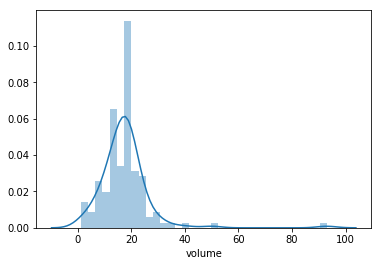

In [15]:
sns.distplot(output_df["volume"])

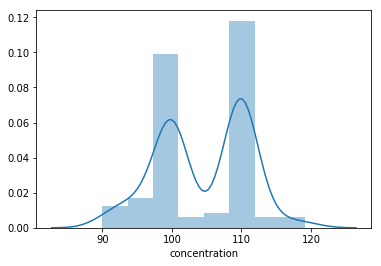

In [16]:

sns.distplot(output_df["concentration"])

In [14]:
output_df.to_csv("riboswitch_plasmids.csv", index=False)

In [3]:
def get_completed_jobs(operation_type):
    ops = session.Operation.where({"operation_type_id": operation_type.id, 'status': 'done'})
    print("Found {} Operations of type {}".format(len(ops), operation_type.name))

    op_ids = [op.id for op in ops]
    job_associations = session.JobAssociation.where({"operation_id": op_ids})

    job_ids = [ja.job_id for ja in job_associations]
    jobs = session.Job.find(job_ids)
    jobs = [j for j in jobs if j.state[-1]['operation'] == "complete"]
    print("Found {} completed Jobs of type {}".format(len(jobs), operation_type.name))
    
    return jobs

In [4]:
def get_delta(times):
    start = dateutil.parser.parse(times[0])
    end = dateutil.parser.parse(times[1])
    return (end - start).seconds/60

def get_step_times(state):
    times = [s["time"] for s in state if s["operation"] == "next"]
    step_times = []
    
    i = 0
    while i < (len(times) - 1):
        step_times.append(get_delta([times[i], times[i+1]]))
        i += 1
    
    return step_times

In [19]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
    
def get_job_stats(operation_type, window_start=None):
    job_stats = []
    
    query = "operation_type_id = {} AND status = 'done'".format(operation_type.id)
        
    if window_start:
        query += " AND updated_at >= '{}'".format(window_start)
        
    operations = session.Operation.where(query)
    print("Found {} Operations of type {}".format(len(operations), operation_type.name))

    op_ids = [op.id for op in operations]
    job_associations = session.JobAssociation.where({"operation_id": op_ids})

    job_ids = list(set([ja.job_id for ja in job_associations]))
    nested_job_ids = chunks(job_ids, 25)        
    jobs = []
    
    for these_job_ids in nested_job_ids:
        jobs += session.Job.find(these_job_ids)
                    
    print("Found {} completed Jobs of type {}".format(len(jobs), operation_type.name))
    
    for job in jobs:
        if len(job.state) < 5:
            continue
        js = {}
        js["id"] = job.id
        these_job_associations = [j for j in job_associations if j.job_id == job.id]
        js["n_ops"] = len(these_job_associations)
        js["start_time"] = job.state[2].get('time')
        js["stop_time"] = job.state[-2].get('time')
        
        if js["start_time"] and js["stop_time"]:
            js["duration"] = get_delta((js["start_time"], js["stop_time"]))
            
        js["step_times"] = get_step_times(job.state)
        js["length"] = len([s for s in job.state if s["operation"] == "display"])
        js["job_completeness"] = job.is_complete
        js["state_completeness"] = job.state[-1]['operation']
        js["complete"] = job.is_complete and job.state[-1]['operation'] == "complete"
        job_stats.append(js)
    
    return job_stats

columns = [
    "n_ops", 
    "start_time", 
    "stop_time", 
    "duration", 
    "length", 
    "job_completeness", 
    "state_completeness", 
    "complete"
]

In [33]:
pacific = timezone('US/Pacific')

window_start = pacific.localize(datetime(2018, 9, 22))
print(window_start)

2018-09-22 00:00:00-07:00


In [34]:
categories = [
    'Cloning',
    'Yeast'
]

operation_types = session.OperationType.where({'category': categories})

# operation_type_names = [
#     'Challenge and Label',
#     'Innoculate Yeast Library',
#     'Store Yeast Library Sample',
#     'Sort Yeast Display Library',
#     'Mix Cultures'
# ]

# operation_type_names = [
#     'Challenge and Label'
# ]

# operation_types = session.OperationType.where({"name": operation_type_names})

ot_data = []
for operation_type in operation_types:
    jobs = get_job_stats(operation_type, window_start)
    ot_data.append((operation_type, jobs))

Found 0 Operations of type Assemble NEB Golden Gate
Found 0 completed Jobs of type Assemble NEB Golden Gate


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


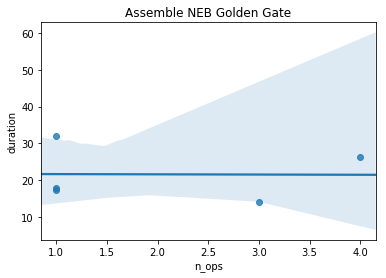

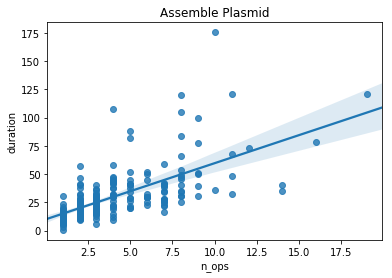

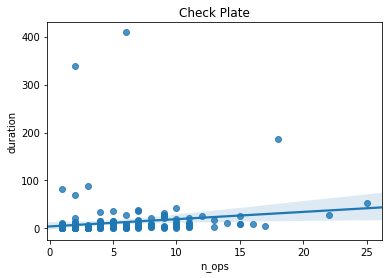

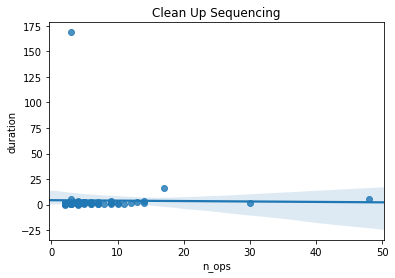

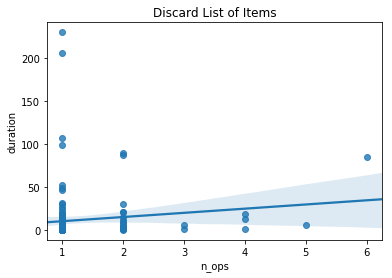

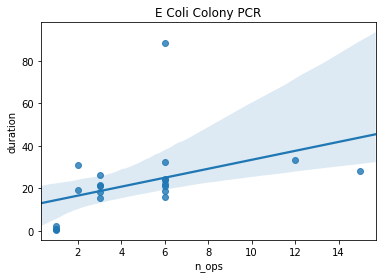

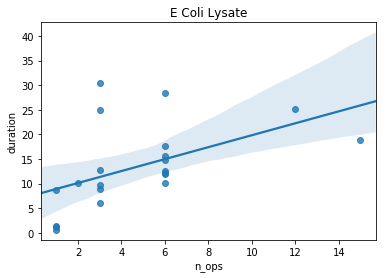

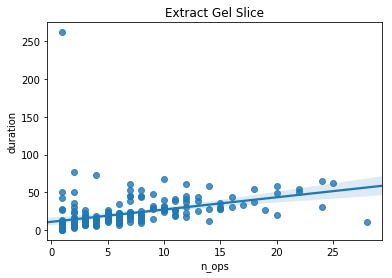

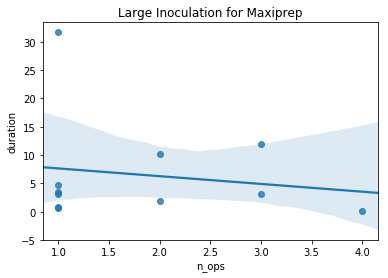

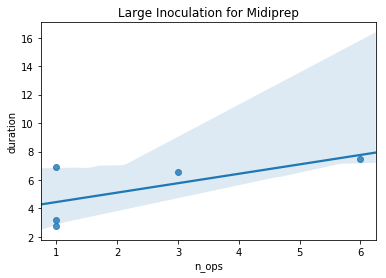

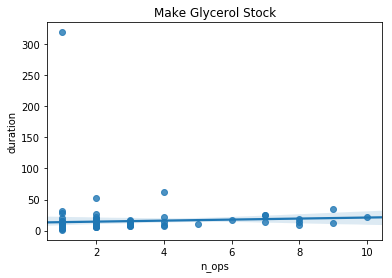

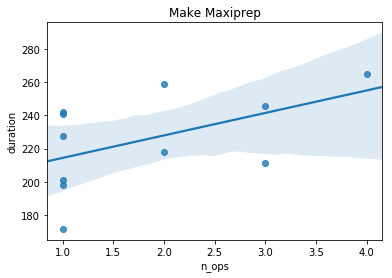

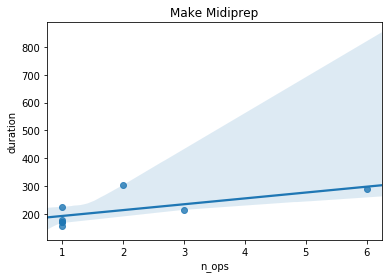

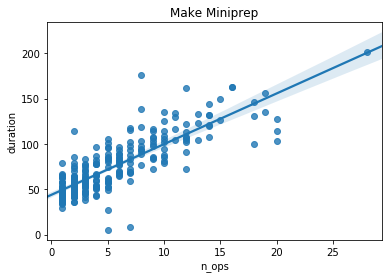

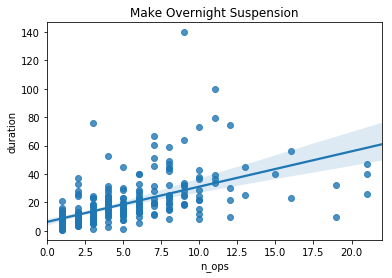

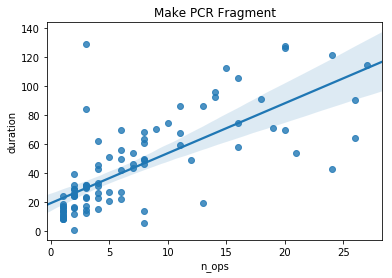

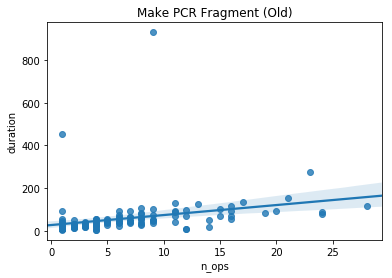

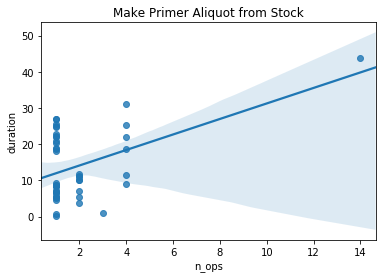

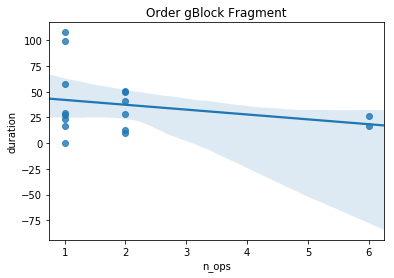

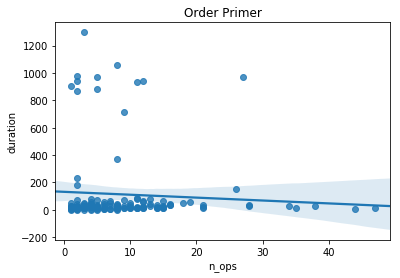

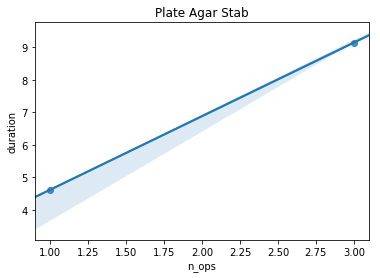

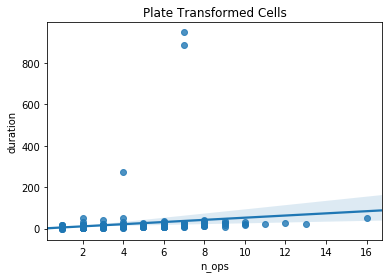

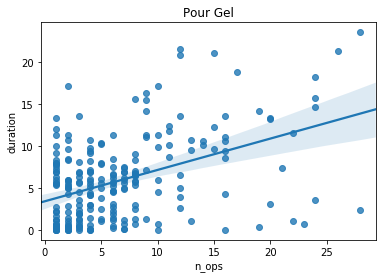

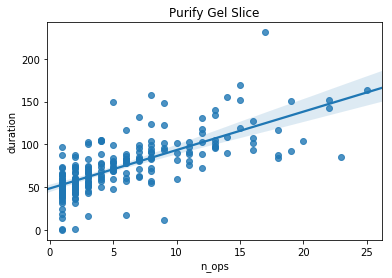

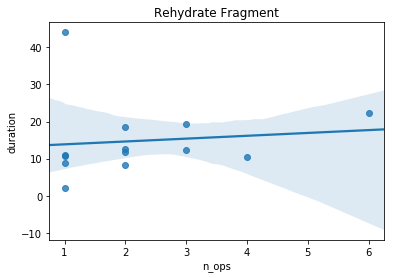

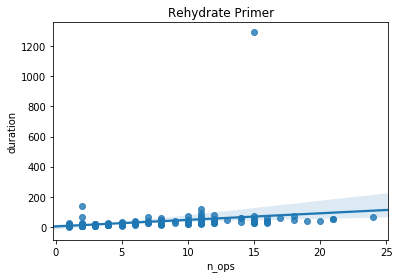

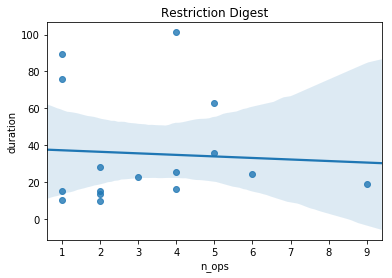

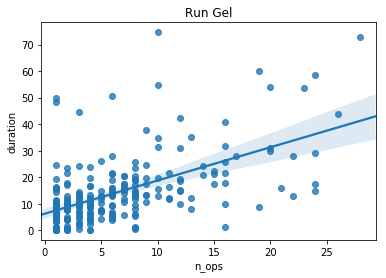

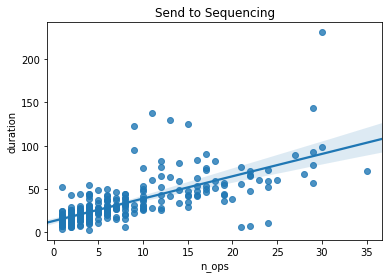

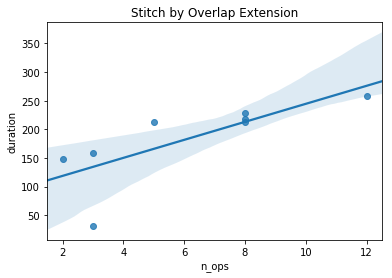

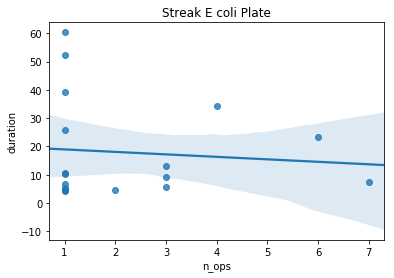

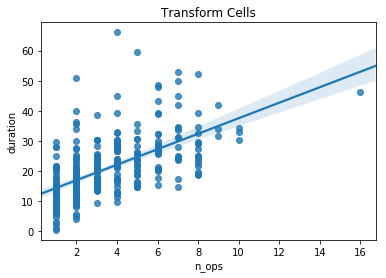

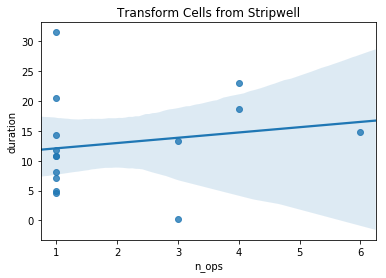

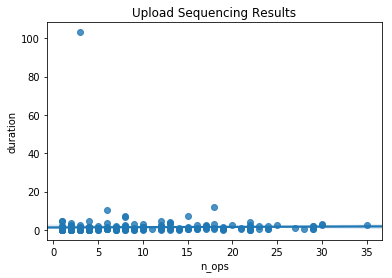

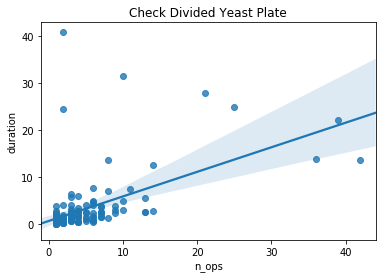

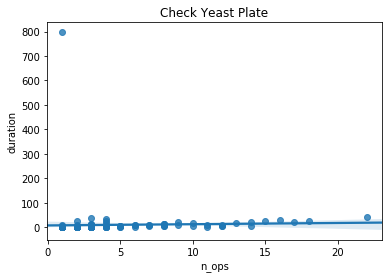

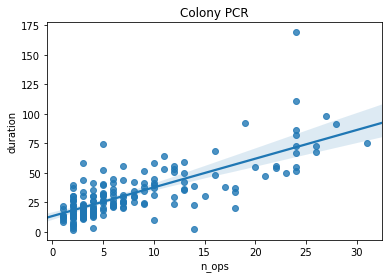

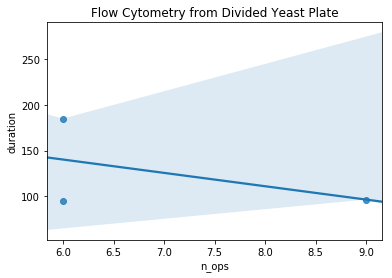

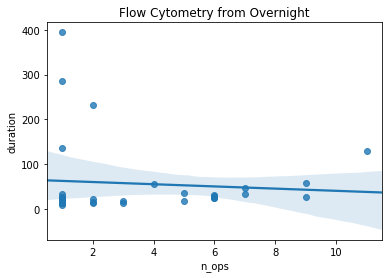

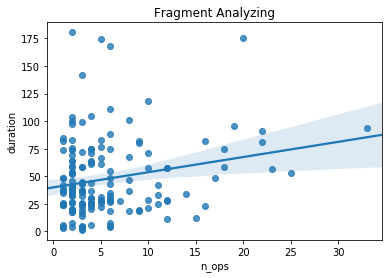

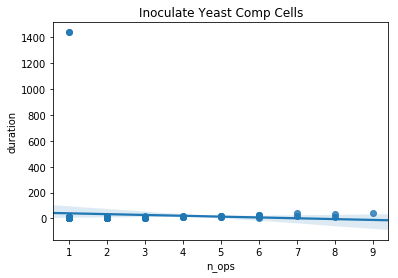

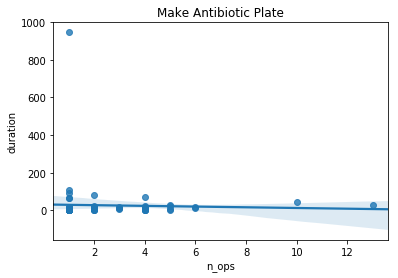

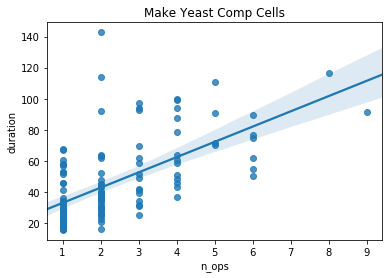

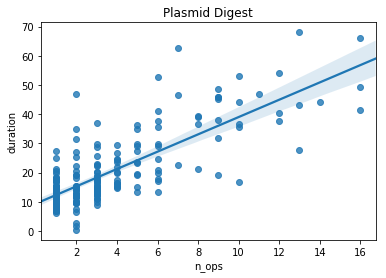

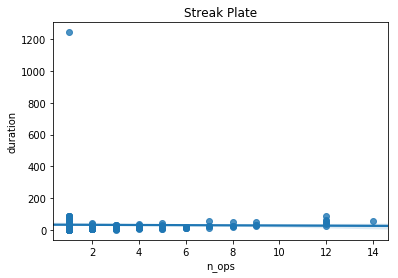

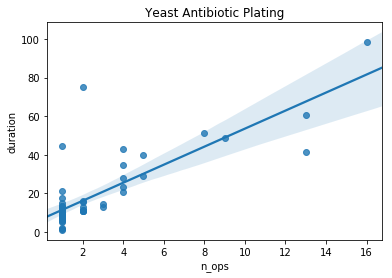

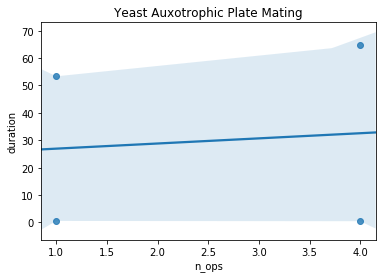

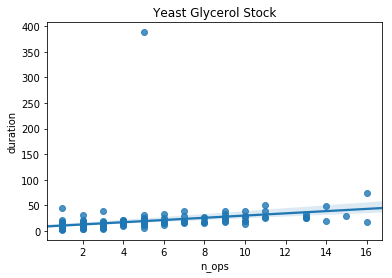

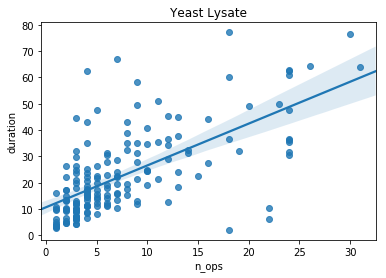

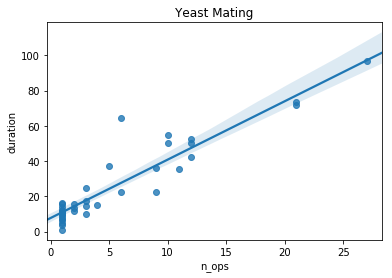

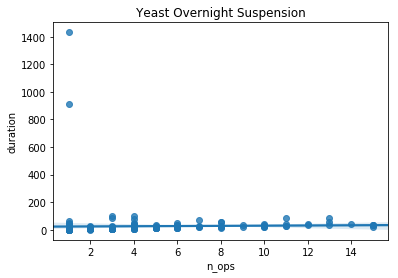

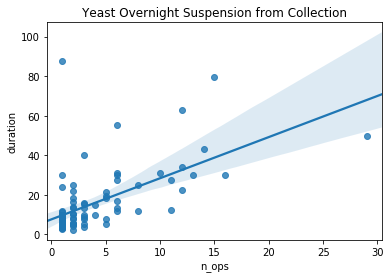

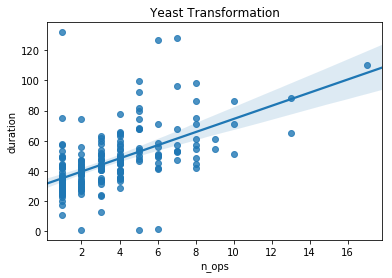

,job_name,num,mean_time,median_time,mean_size,median_size,mean_time_per_operation,median_time_per_operation
0,Assemble NEB Golden Gate,5,21.576667,17.950000,2.000000,1.0,15.736667,17.383333
1,Assemble Plasmid,253,29.008432,24.466667,3.833992,3.0,8.913784,8.220833
2,Check Plate,233,11.399142,3.383333,4.759657,4.0,3.172671,0.916667
3,Clean Up Sequencing,71,4.044524,1.258333,6.084507,4.0,1.134712,0.301389
4,Discard List of Items,166,11.414759,3.208333,1.246988,1.0,9.825950,2.741667
5,E Coli Colony PCR,21,22.213492,21.350000,4.666667,3.0,5.236177,3.963889
6,E Coli Lysate,21,13.415873,12.250000,4.714286,3.0,3.405040,2.475000
7,Extract Gel Slice,216,20.838657,14.691667,5.921296,4.0,6.008149,3.163889
8,Large Inoculation for Maxiprep,11,6.530303,3.150000,1.818182,1.0,5.053283,3.083333
9,Large Inoculation for Midiprep,5,5.376667,6.550000,2.400000,1.0,3.261667,2.766667


In [31]:
output_columns = [
    "job_name",
    "num", 
    "mean_time", 
    "median_time", 
    "mean_size", 
    "median_size", 
    "mean_time_per_operation", 
    "median_time_per_operation"
]

output_data = []

for operation_type, jobs in ot_data:
    all_data = pd.DataFrame(data=jobs, columns=columns)
    completed_data = all_data[all_data["complete"]]
    
    if completed_data.get("duration") is None: continue
        
    completed_data["time_per_operation"] = completed_data["duration"] / completed_data["n_ops"]
    ax = sns.regplot(x="n_ops", y="duration", data=completed_data)
    ax.set_title(operation_type.name)
    plt.show()
    
    summary = completed_data.describe()
    output_row = {}
    output_row["job_name"] = operation_type.name
    output_row["num"] = len(completed_data)
    output_row["mean_time"] = summary["duration"]["mean"]
    output_row["median_time"] = summary["duration"]["50%"]
    output_row["mean_size"] = summary["n_ops"]["mean"]
    output_row["median_size"] = summary["n_ops"]["50%"]
    
    if summary.get("time_per_operation") is not None:
        output_row["mean_time_per_operation"] = summary["time_per_operation"]["mean"]
        output_row["median_time_per_operation"] = summary["time_per_operation"]["50%"]
        
    output_data.append(output_row)
    
output_df = pd.DataFrame(data=output_data, columns=output_columns)
output_df
#     times = [j["step_times"] for j in jobs]
#     temp = [t[0] for t in times]
#     time_data = pd.DataFrame(data=times)
#     print(time_data.shape)
#     print(len(jobs))
#     print((max([j["length"] for j in jobs])))
#     df_first_row = list(time_data.iloc[1])
#     fig, ax = plt.subplots()
#     fig.set_size_inches(20, 5)
#     sns.swarmplot(data=time_data, size=4)
#     ax.set_title(operation_type.name)
#     ax.set_xlabel("step")
#     ax.set_ylabel("duration")
#     plt.show()

In [32]:
output_df.to_csv("job_stats.csv", index=False)

In [ ]:
deltas = []

for time in times:
    start = dateutil.parser.parse(time[0])
    end = dateutil.parser.parse(time[1])
    delta = (end - start).seconds/60
    deltas.append(delta)

In [ ]:
sns.distplot(deltas, kde=False)
print(median([d for d in deltas if d < 500]))
data = list(zip(lengths, completeness, state_completeness))
data.sort(key=lambda x: x[0])
for d in data:
    print(d)

In [3]:
job = session.Job.find(92183)

In [6]:
print(job.state[1])

{'operation': 'display', 'content': [{'title': 'Boxes Required'}, {'note': 'You will need the following boxes from the freezer(s)'}, {'table': [[{'content': 'M20.23.4', 'check': True}, {'content': 'M20.23.13', 'check': True}, {'content': 'M20.24.1', 'check': True}, {'content': 'M20.24.2', 'check': True}, {'content': 'M20.24.3', 'check': True}, {'content': 'M20.24.4', 'check': True}]]}]}
